<a href="https://colab.research.google.com/github/gabi-joye/f1_winner_1950-2025_analysis/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/winners_f1_1950_2025_v2.csv')

In [3]:
df

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950
...,...,...,...,...,...,...,...,...,...
1137,2025-06-15,North America,Canada,Circuit Gilles Villeneuve,George Russell,Mercedes,01:31:52,70.0,2025
1138,2025-06-29,Europe,Austria,Red Bull Ring,Lando Norris,McLaren,01:23:47,70.0,2025
1139,2025-07-06,Europe,Great Britain,Silverstone Circuit,Lando Norris,McLaren,01:37:15,52.0,2025
1140,2025-07-27,Europe,Belgium,Circuit de Spa Francorchamps,Oscar Piastri,McLaren,01:25:22,44.0,2025


In [6]:
# First I need to make sure all numerical data has the correct data type for us to ba able to .agg()
#By using .dtypes we can see all categories ddatatypes
df.dtypes

,0
date,object
continent,object
grand_prix,object
circuit,object
winner_name,object
team,object
time,object
laps,float64
year,int64


In [7]:
# code to turn string 'time' to time_delta and add it to a new column so we are able to .agg()


df = df.replace({"time":{
    "0:42:53": "00:42:53",
    "0:57:56": "00:57:56",
    "0:24:34": "00:24:34",
    "55:30": "00:55:30",
    "3:27": "00:32:70"
}})

df["time_delta"] = pd.to_timedelta("00:" + df["time"].str.replace(r":(?=[^:]+$)", ".", regex=True))

In [8]:
# code to turn date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   date         1142 non-null   datetime64[ns] 
 1   continent    1142 non-null   object         
 2   grand_prix   1142 non-null   object         
 3   circuit      1142 non-null   object         
 4   winner_name  1142 non-null   object         
 5   team         1142 non-null   object         
 6   time         1142 non-null   object         
 7   laps         1142 non-null   float64        
 8   year         1142 non-null   int64          
 9   time_delta   1142 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 89.3+ KB


In [10]:
#  use the .groupby() method to group by "teams" category then use .count() to see how many times each team has one a race.
df.groupby('team')['team'].count().sort_values(ascending=False)

,team
team,
Ferrari,249
Mercedes,121
McLaren Mercedes,85
Williams Renault,64
Lotus Ford,47
...,...
Porsche,1
Stewart Ford,1
Shadow Ford,1


In [11]:
# Use .groupby() methodto group by our winner_name category then use .count() to see how many times each racer has won a race.
df.groupby('winner_name')['winner_name'].count().sort_values(ascending=False)

,winner_name
winner_name,
Lewis Hamilton,105
Michael Schumacher,91
Max Verstappen,65
Sebastian Vettel,53
Alain Prost,51
...,...
Rodger Ward,1
Sam Hanks,1
Richie Ginther,1


In [12]:
# Create a new dataset of average race time per decade
avg_time_dec= df.groupby(df["date"].dt.year // 10 * 10)["time_delta"].mean().reset_index()
avg_time_dec

,date,time_delta
0,1950,0 days 00:02:51.977586206
1,1960,0 days 00:02:12.397200
2,1970,0 days 00:01:42.541041666
3,1980,0 days 00:01:37.950512820
4,1990,0 days 00:01:36.011419753
5,2000,0 days 00:01:31.954425287
6,2010,0 days 00:01:37.796313131
7,2020,0 days 00:01:36.831900826


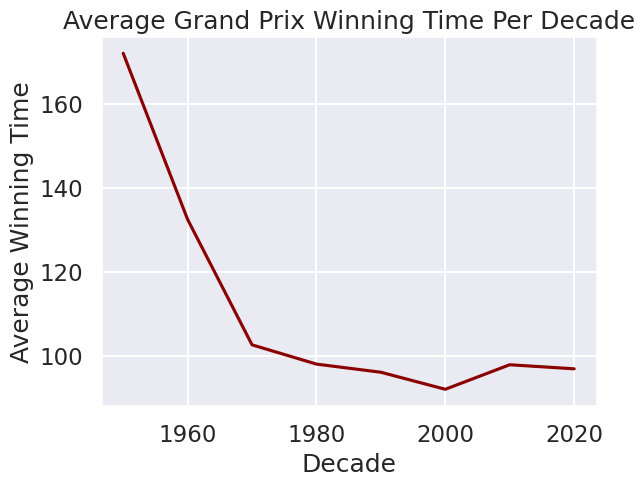

In [54]:
# Line chart showing the average grand pric winning time per decade


(sns
  .lineplot(x="date", y="temp", data=avg_time_dec.assign(temp=lambda df: df["time_delta"].dt.total_seconds()),color= "darkred")
  .set(xlabel='Decade', ylabel='Average Winning Time', title='Average Grand Prix Winning Time Per Decade')
)
sns.set(palette="bright", style='darkgrid', context='talk')
plt.linewidth = 6
plt.show()

In [14]:
# create a column for 'time'[ z-scores]
time_std=df["time_delta"].std()
time_mean=df["time_delta"].mean()
df["time_z-score"]= (df["time_delta"]-time_mean)/time_std



In [15]:
#create an outlier column True meaning outlier
df['time_outlier'] = np.where(df['time_z-score'].abs() > 3, True, False)
df['time_outlier'].value_counts()

,count
time_outlier,
False,1122
True,20


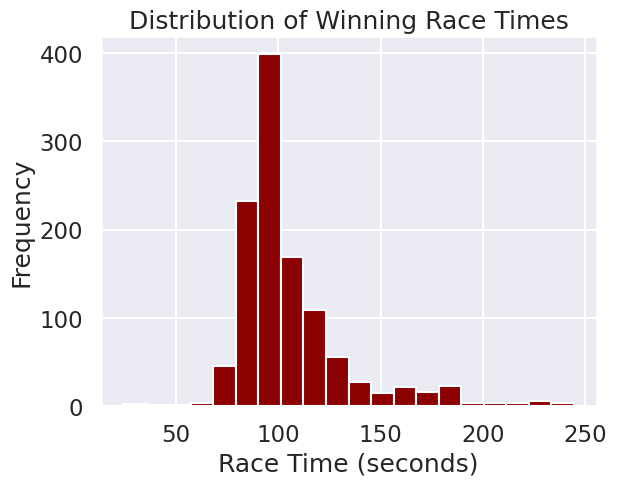

In [57]:
plt.hist(df['time_delta'].dt.total_seconds(), bins=20, color='darkred')
plt.grid(True)
plt.xlabel('Race Time (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Winning Race Times')
plt.show()

In [16]:
# circuits average winning race time
df.groupby('circuit')['time_delta'].mean().sort_values(ascending=False)

,time_delta
circuit,
Circuit de Pedralbes,0 days 00:03:00.030000
Pescara Circuit,0 days 00:02:59.220000
Aintree Circuit,0 days 00:02:49.465000
Indianapolis Motor Speedway,0 days 00:02:48.187368421
Rouen Les Essarts,0 days 00:02:33.540000
...,...
Istanbul Park,0 days 00:01:29.318888888
Lusail International Circuit,0 days 00:01:27.573333333
Red Bull Ring,0 days 00:01:26.175128205


In [28]:
# top 5 fastes finish times
df.sort_values(by='time_delta').head(5)


,date,continent,grand_prix,circuit,winner_name,team,time,laps,year,time_delta,time_z-score,time_outlier
518,1991-11-03,Oceania,Australia,Adelaide Street Circuit,Ayrton Senna,McLaren Honda,00:24:34,14.0,1991,0 days 00:00:24.340000,-2.995095,False
1049,2021-08-29,Europe,Belgium,Circuit de Spa Francorchamps,Max Verstappen,Red Bull Racing Honda,00:32:70,1.0,2021,0 days 00:00:32.700000,-2.687910,False
256,1975-04-27,Europe,Spain,Montjuïc circuit,Jochen Mass,McLaren Ford,00:42:53,29.0,1975,0 days 00:00:42.530000,-2.326712,False
807,2009-04-05,Asia,Malaysia,Sepang International Circuit,Jenson Button,Brawn Mercedes,00:55:30,31.0,2009,0 days 00:00:55.300000,-1.857484,False
264,1975-08-17,Europe,Austria,Red Bull Ring,Vittorio Brambilla,March Ford,00:57:56,29.0,1975,0 days 00:00:57.560000,-1.774442,False


In [29]:
# 5 lowest winning race times.
df.sort_values(by='time_delta').tail(5)

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year,time_delta,time_z-score,time_outlier
25,1953-05-30,North America,United States,Indianapolis Motor Speedway,Bill Vukovich,Kurtis Kraft Offenhauser,03:53:01,200.0,1953,0 days 00:03:53.010000,4.672385,True
52,1956-05-30,North America,United States,Indianapolis Motor Speedway,Pat Flaherty,Watson Offenhauser,03:53:28,200.0,1956,0 days 00:03:53.280000,4.682306,True
44,1955-05-30,North America,United States,Indianapolis Motor Speedway,Bob Sweikert,Kurtis Kraft Offenhauser,03:53:59,200.0,1955,0 days 00:03:53.590000,4.693697,True
8,1951-05-30,North America,United States,Indianapolis Motor Speedway,Lee Wallard,Kurtis Kraft Offenhauser,03:57:38,200.0,1951,0 days 00:03:57.380000,4.832958,True
848,2011-06-12,North America,Canada,Circuit Gilles Villeneuve,Jenson Button,McLaren Mercedes,04:04:39,70.0,2011,0 days 00:04:04.390000,5.090537,True


In [30]:
# average laps per decade
df.groupby(df["date"].dt.year // 10 * 10)["laps"].mean().reset_index()

,date,laps
0,1950,81.402299
1,1960,70.910000
2,1970,64.458333
3,1980,64.211538
4,1990,63.993827
5,2000,62.390805
6,2010,59.888889
7,2020,59.834711


In [35]:
# correlation between numerical columns
df.select_dtypes(include=np.number).corr()

,laps,year,time_delta,time_z-score
laps,1.000000,-0.241424,0.475797,0.475797
year,-0.241424,1.000000,-0.587766,-0.587766
time_delta,0.475797,-0.587766,1.000000,1.000000
time_z-score,0.475797,-0.587766,1.000000,1.000000


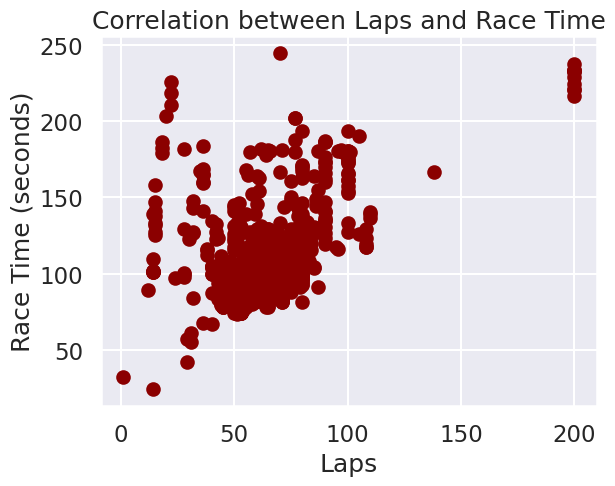

In [56]:
# correlation between laps and race times graphed
plt.scatter(df['laps'], df['time_delta'].dt.total_seconds(), color='darkred')
plt.grid(True)
plt.xlabel('Laps')
plt.ylabel('Race Time (seconds)')
plt.title('Correlation between Laps and Race Time')
plt.show()

In [36]:
# create a time per lap column
df["time_per_lap"]= df['time_delta'].dt.total_seconds()/df['laps']

In [38]:
# Create a new dataset of average race time per decade
avg_lap_time_dec= df.groupby(df["date"].dt.year // 10 * 10)["time_per_lap"].mean().reset_index()
avg_lap_time_dec

,date,time_per_lap
0,1950,2.996617
1,1960,2.597446
2,1970,1.844854
3,1980,1.559372
4,1990,1.529338
5,2000,1.495704
6,2010,1.655738
7,2020,1.918629


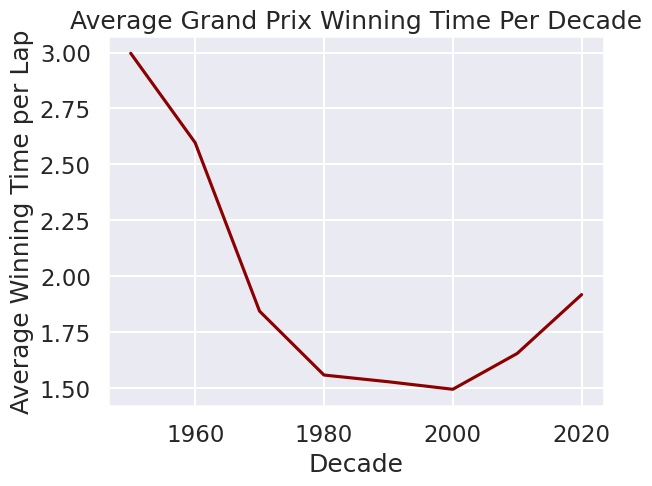

In [55]:
# Line chart showing the average grand pric winning time per decade

(sns
  .lineplot(x="date", y="time_per_lap", data=avg_lap_time_dec, color= "darkred")
  .set(xlabel='Decade', ylabel='Average Winning Time per Lap', title='Average Grand Prix Winning Time Per Decade')
)
sns.set(palette="bright", style='darkgrid', context='talk')
plt.linewidth = 6
plt.show()